In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = (30,15)

In [ ]:
df = pd.read_csv('/content/ufo_sightings_scrubbed.csv')#,encoding='latin-1')
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
8,1966-10-10 20:00:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,2009-03-19,33.5861111,-86.286111
9,1966-10-10 21:00:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.2947222,-82.984167


## **which shapes of UFOs tend to be seen most often.**

In [ ]:
df[['shape','city']].groupby('shape').count().sort_values('city', ascending = False).rename({'city': 'count'}, axis='columns').head(7)

,count
shape,
light,16565
triangle,7865
circle,7608
fireball,6208
other,5649
unknown,5584
sphere,5387


As you can see, the most common shapes of UFOs are as follows:

1.   light
2.   triangle
3.   circle



## **How have annual sightings trended since the year 2000?**

In [ ]:
df['year'] = pd.to_datetime(df['datetime']).dt.year

Text(0, 0.5, 'Number of sightings')

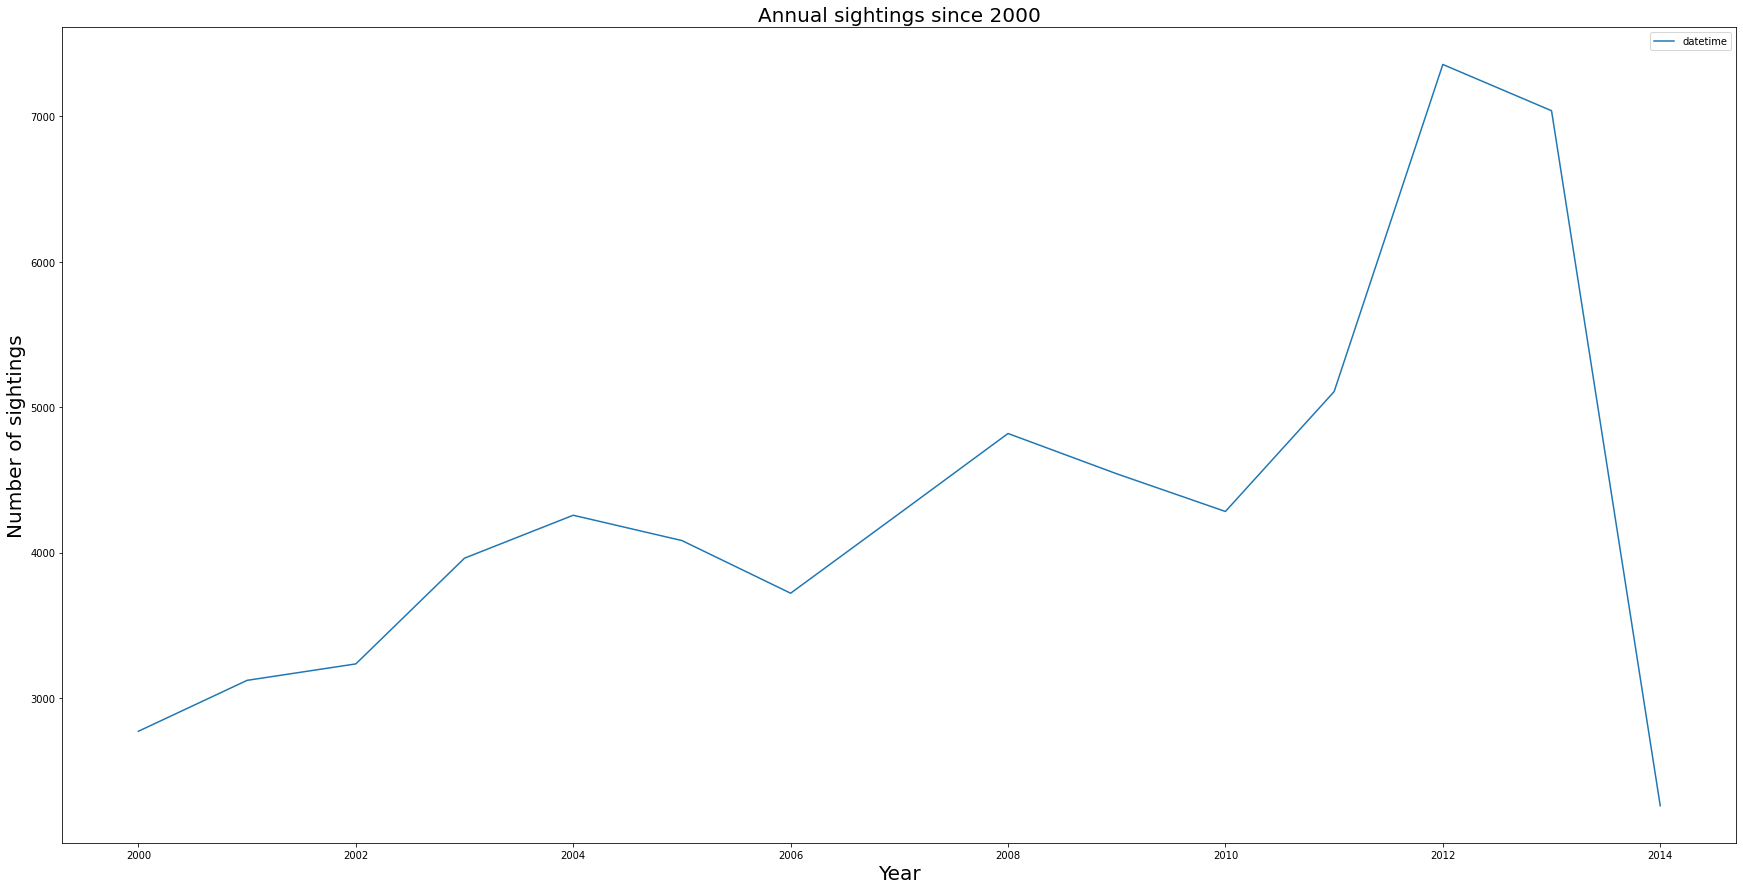

In [ ]:
df[df.year>1999][['year', 'datetime']].groupby('year').count().plot.line(figsize = x)
plt.title('Annual sightings since 2000', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of sightings', fontsize=20)

As we entered the new century the number of sightings were continuing to rise until 2012. That year, sightings began to decline, possibly due to the popularity of smartphones. Since there were more smartphones with decent cameras, it was less likely to confuse a smudge in the image with a UFO as it was easier to verify the validity of the ufo claim.

## **Which states report the most UFO sightings? What do you think about this?**

In [ ]:
states = df[['year', 'state']].groupby('state').count().sort_values('year', ascending = False).rename({'year': 'count'}, axis='columns')
states.head(10)

,count
state,
ca,9655
wa,4268
fl,4200
tx,3677
ny,3219
az,2689
il,2645
pa,2582
oh,2425


Text(0.5, 1.0, 'Number of UFO sightings by state')

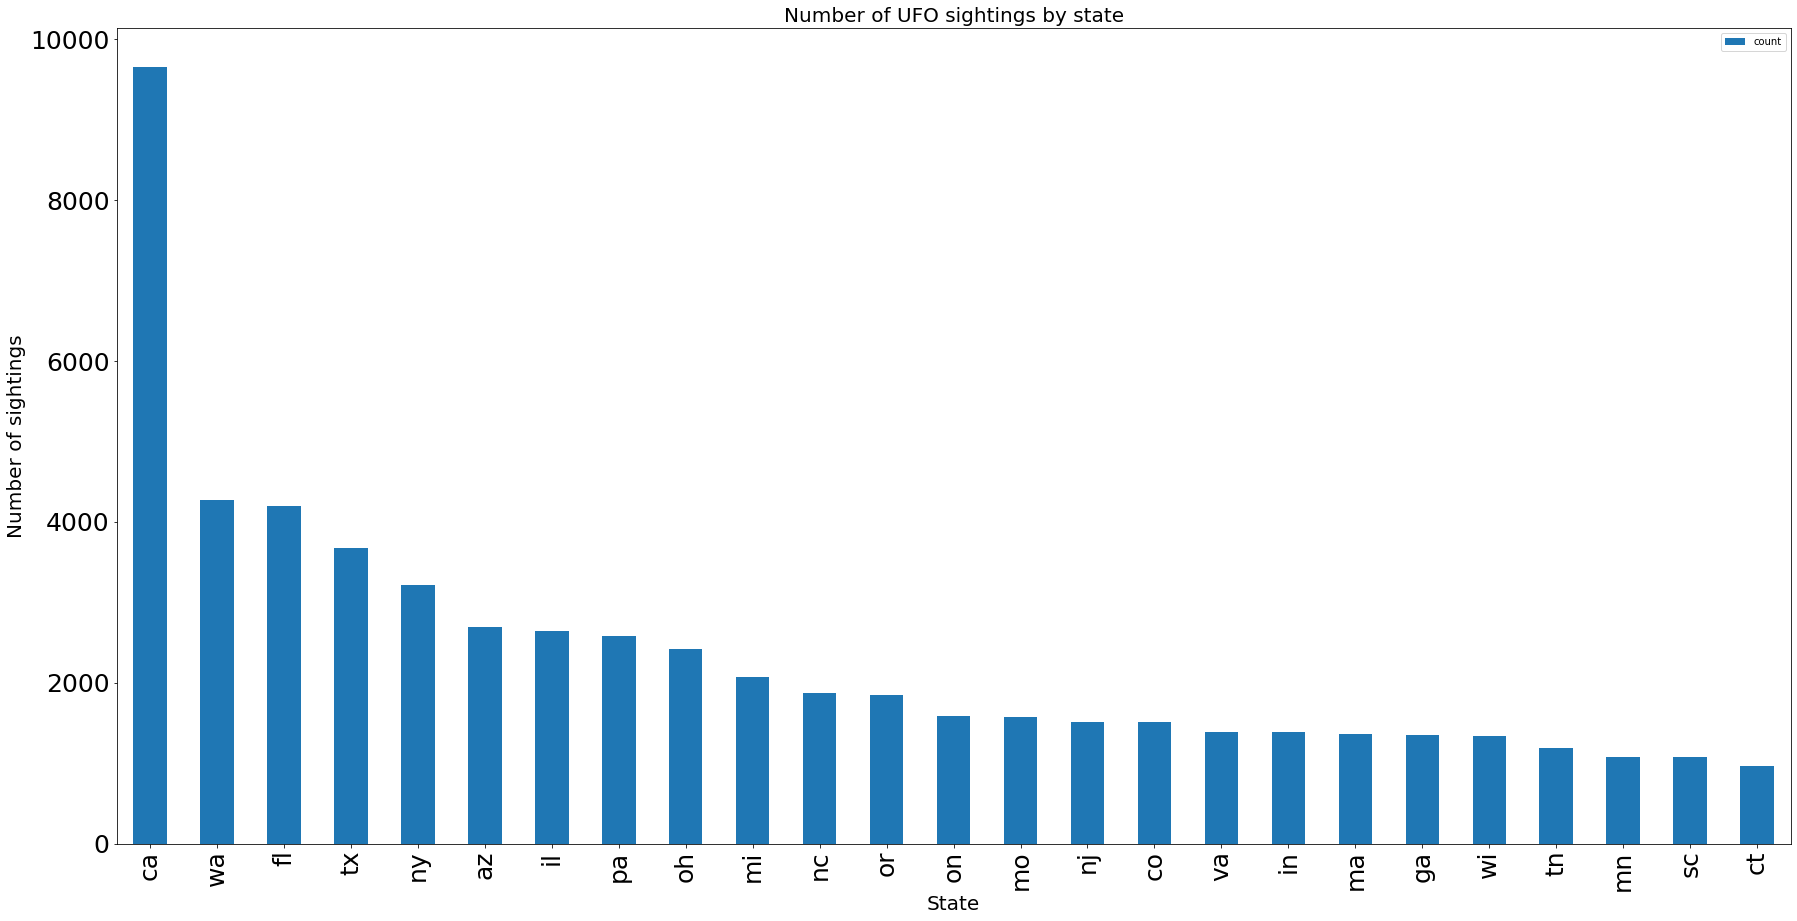

In [ ]:
states.head(25).plot.bar(figsize= x)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Number of sightings', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.title('Number of UFO sightings by state', fontsize=20)

The number of UFO sightings is highest in California, which makes sense considering the large size of the sate and the size of the population. People report seeing UFOs everywhere and it makes sense to have more reports in CA.

## **The distribution of the duration of UFO sightings**

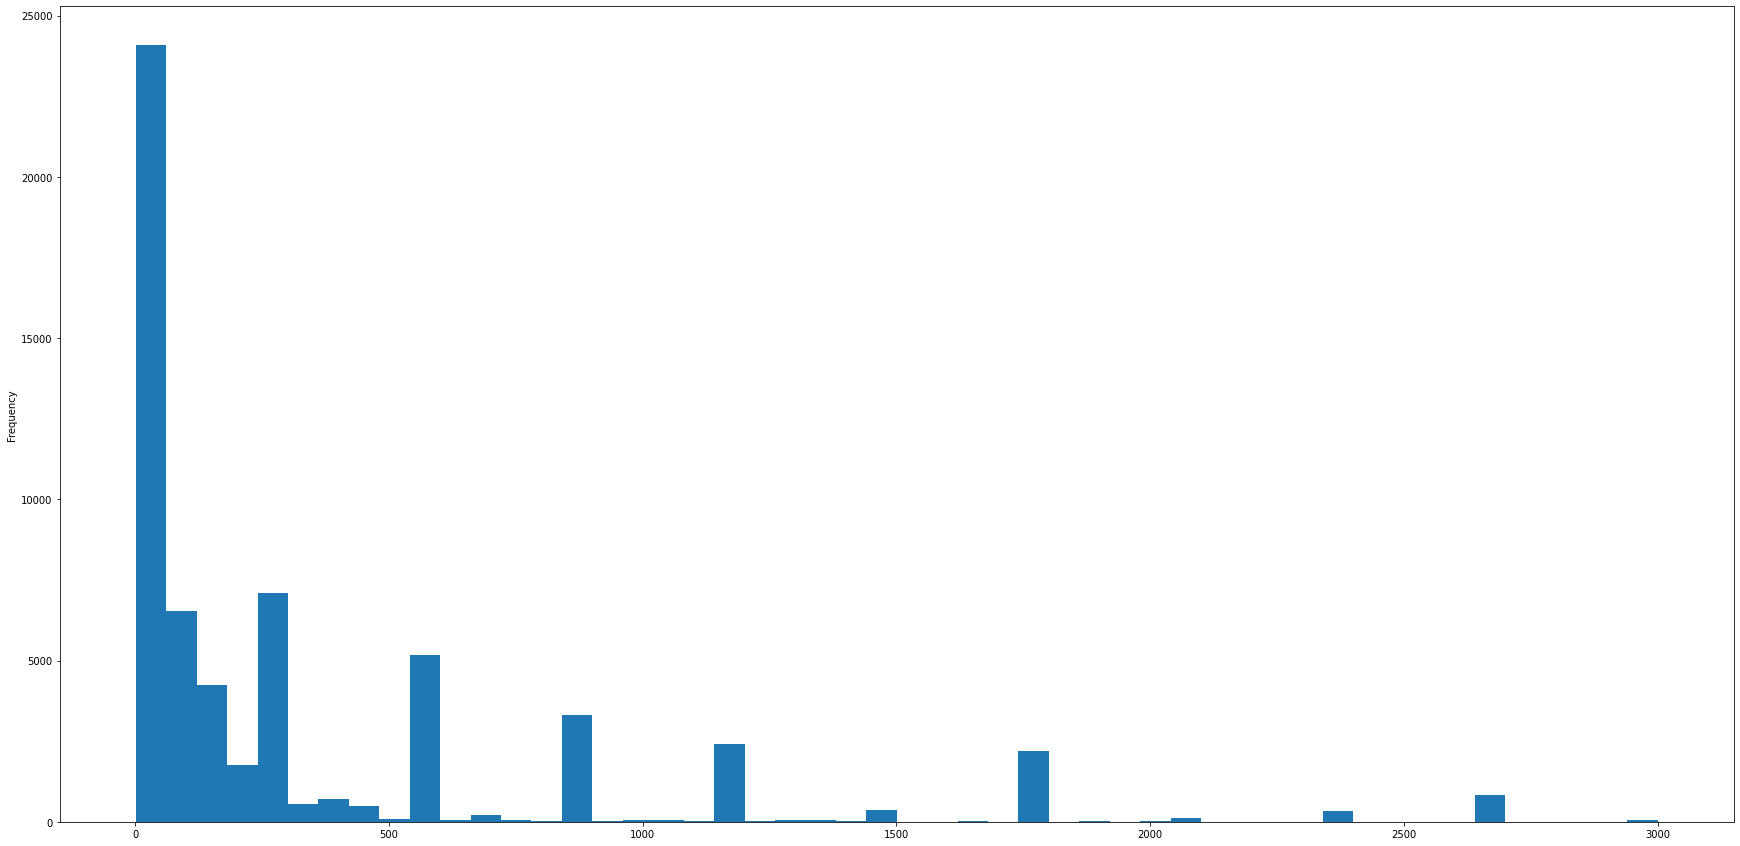

In [ ]:
df['duration'] = df['duration (seconds)'].str.replace(r'[^\w\s]+', '', regex = True).dropna().astype(int)
dur = df[df['duration'] <= 3000][['duration', 'state']]
dur.plot.hist(bins = 50, figsize = x,legend=None)


As seen in the histogram, the frequency of sightings that occur for a few seconds are the most coommon occcurance